# Data Analysis Project: Bike Sharing Dataset
- **Name:** Hilda Nasywa Nurhaliza
- **Email:** M268B4KX1783@bangkit.academy
- **ID Dicoding:** M268B4KX1783

## Defining Business Questions

- Question 1: What is the pattern of bike usage based on season and time of day?
- Question 2: How does weather affect the number of bike users?

## Import All Used Packages/Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/hinnza/Analysis-of-the-Bike-Sharing-Dataset/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/hinnza/Analysis-of-the-Bike-Sharing-Dataset/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- The day_df and hour_df datasets have been successfully loaded with the appropriate data columns for analysis.
- The data contains essential features such as weather conditions, bike counts, and seasonal information, which will be useful for answering the business questions.

### Assessing Data

#### Assess the day_df table

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print("Number of duplications: ", day_df.duplicated().sum())

Number of duplications:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Assess the hour_df table

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
print("Number of duplications: ", hour_df.duplicated().sum())

Number of duplications:  0


In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Both day_df and hour_df datasets have no missing values, and no duplicates were found, ensuring the data is clean and ready for analysis.
- The data types are correctly assigned for all columns, with numeric values representing the variables and the date column converted to the datetime format.

### Cleaning Data

#### Cleaning the day_df table

Duplicate data

In [12]:
day_df.duplicated().sum()

0

Missing value

In [13]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Inaccurate value

In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Data type conversion

In [15]:
day_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


In [16]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [17]:
day_df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


#### Cleaning the hour_df table

Duplicate data

In [18]:
hour_df.duplicated().sum()

0

Missing value

In [19]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Inaccurate value

In [20]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Data type conversion

In [21]:
hour_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


In [22]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [23]:
hour_df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


**Insight:**
- No duplicate entries were found in both datasets, indicating no redundancy in the data.
- Data types were correctly converted, and the dteday column was formatted as a datetime object for easier analysis of time-related trends.

## Exploratory Data Analysis (EDA)

EDA Univariate

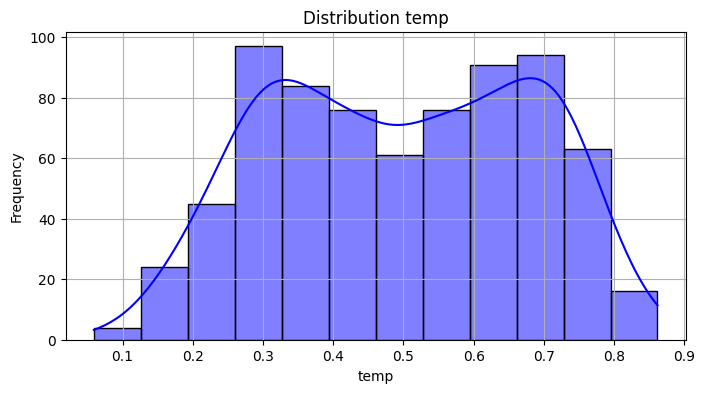

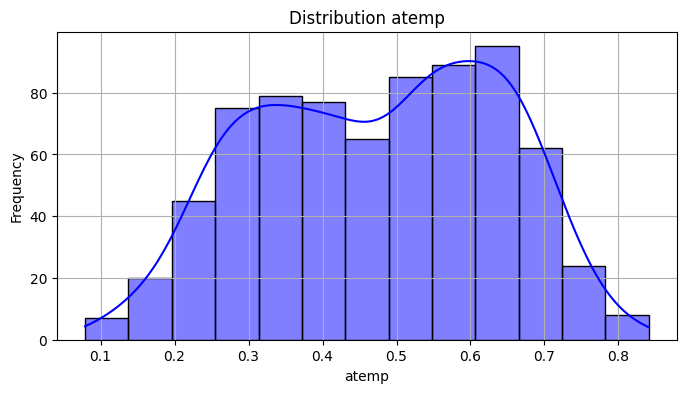

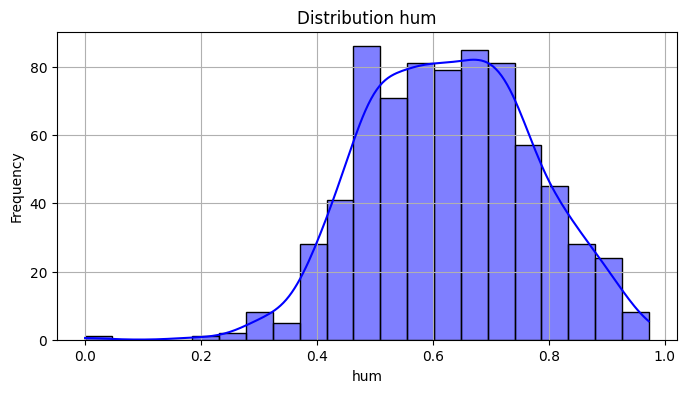

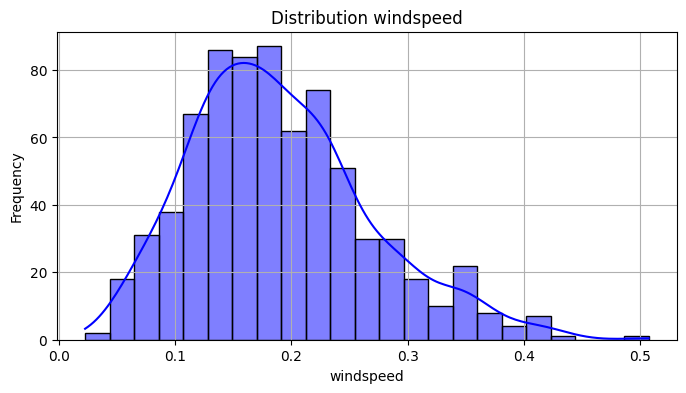

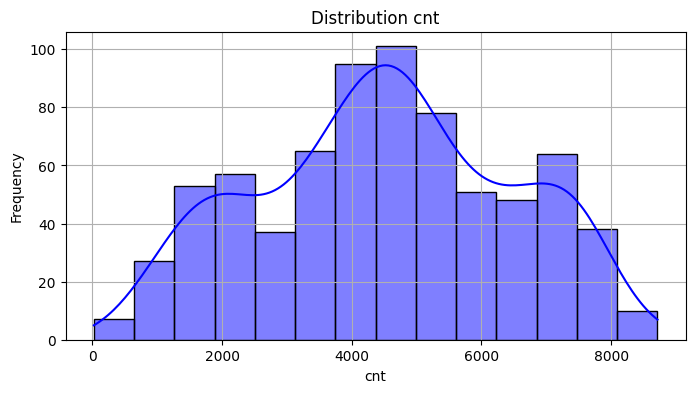

In [24]:
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(day_df[col], kde=True, color='blue')
    plt.title(f'Distribution {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

<ipython-input-25-0b218f5ffd89>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x=col, palette='pastel')


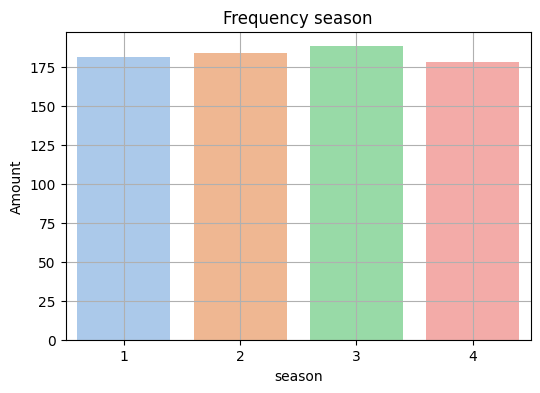

<ipython-input-25-0b218f5ffd89>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x=col, palette='pastel')


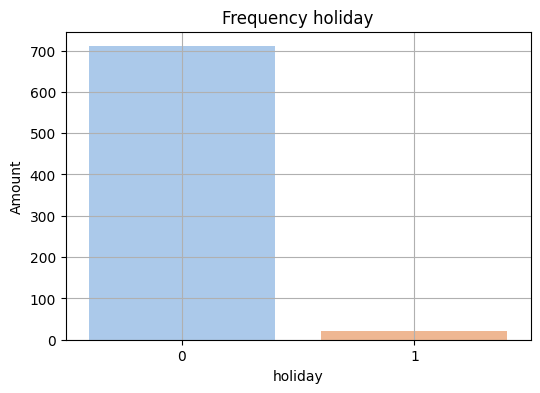

<ipython-input-25-0b218f5ffd89>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x=col, palette='pastel')


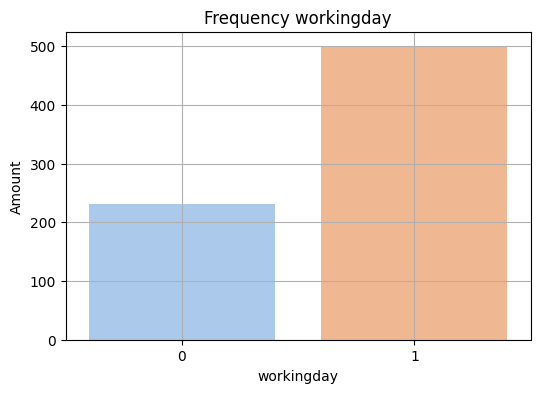

<ipython-input-25-0b218f5ffd89>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x=col, palette='pastel')


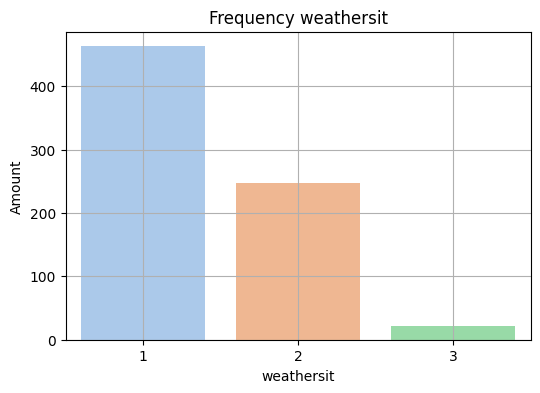

In [25]:
categorical_cols = ['season', 'holiday', 'workingday', 'weathersit']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=day_df, x=col, palette='pastel')
    plt.title(f'Frequency {col}')
    plt.xlabel(col)
    plt.ylabel('Amount')
    plt.grid(True)
    plt.show()

EDA Multivariate

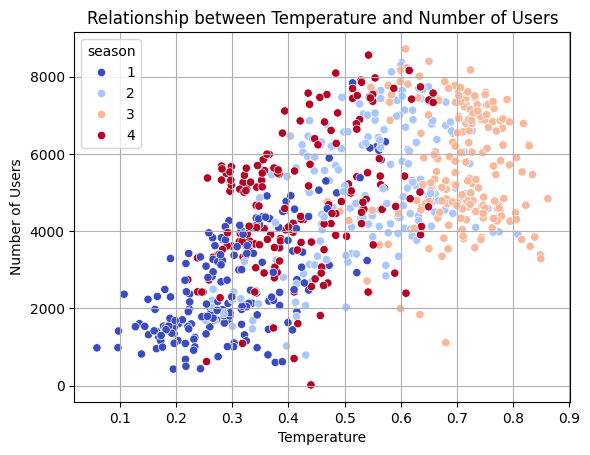

In [26]:
sns.scatterplot(data=day_df, x='temp', y='cnt', hue='season', palette='coolwarm')
plt.title('Relationship between Temperature and Number of Users')
plt.xlabel('Temperature')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

<ipython-input-27-6ff610a5f78f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df, x='season', y='cnt', palette='coolwarm')


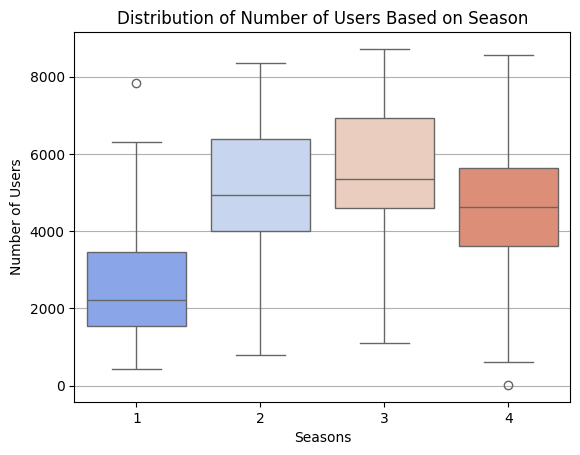

In [27]:
sns.boxplot(data=day_df, x='season', y='cnt', palette='coolwarm')
plt.title('Distribution of Number of Users Based on Season')
plt.xlabel('Seasons')
plt.ylabel('Number of Users')
plt.grid(axis='y')
plt.show()

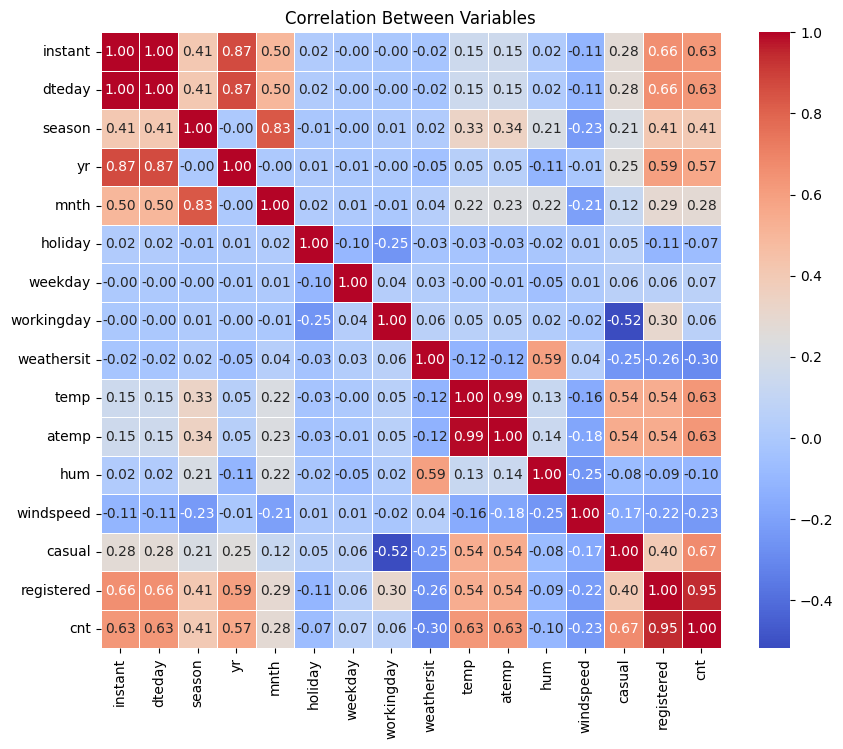

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Variables')
plt.show()

**Insight:**
- Temperature has a positive relationship with the number of users, while wind speed has a negative one.
- Bike usage peaks in the morning and evening on weekdays and is more evenly spread on weekends.
- Summer and fall have the highest number of users, while winter has the lowest.
- Clear weather increases the number of users, whereas bad weather, like heavy rain or snow, reduces activity.

## Visualization & Explanatory Analysis

### Question 1: What is the pattern of bike usage based on season and time of day?

In [29]:
hour_df['season_name'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
activity_by_season = hour_df.groupby(['season_name', 'hr'])['cnt'].mean().reset_index()

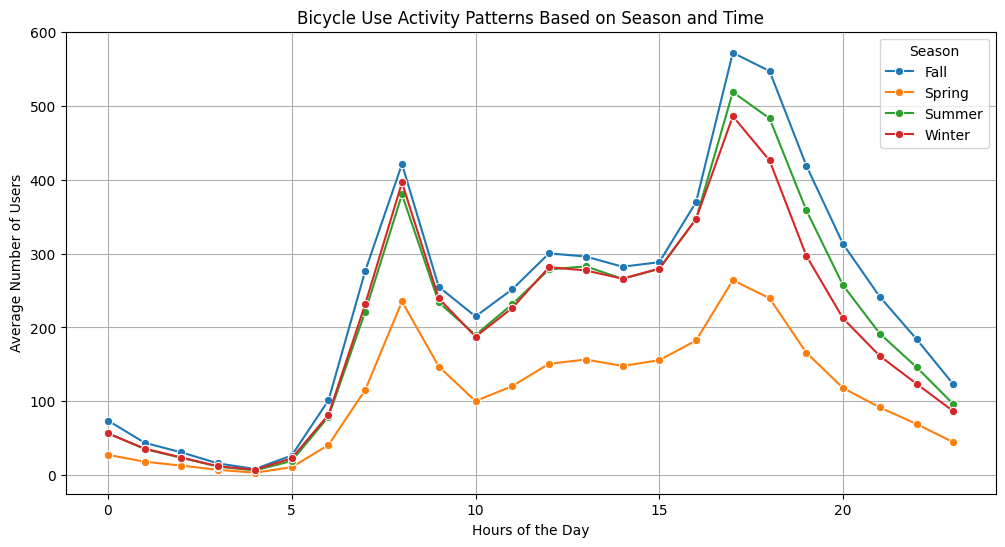

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=activity_by_season, x='hr', y='cnt', hue='season_name', marker='o')
plt.title("Bicycle Use Activity Patterns Based on Season and Time")
plt.xlabel("Hours of the Day")
plt.ylabel("Average Number of Users")
plt.legend(title="Season")
plt.grid(True)
plt.show()

### Question 2: How does weather affect the number of bike users?

In [31]:
hour_df['weathersit_name'] = hour_df['weathersit'].replace({
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Snow/Rain'
})
weather_effect = hour_df.groupby('weathersit_name')['cnt'].mean().reset_index()

<ipython-input-32-5c5a0ab965e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_effect, x='weathersit_name', y='cnt', palette='viridis')


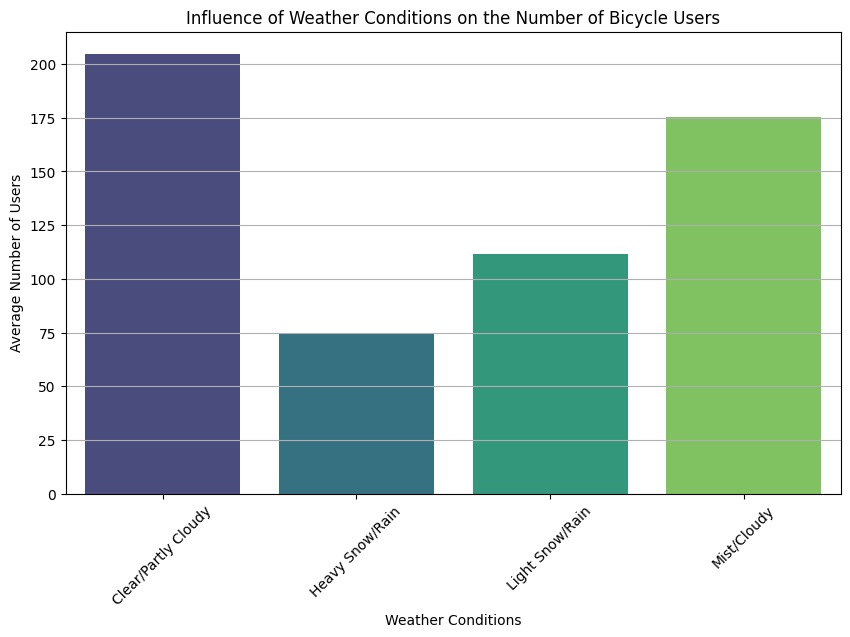

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_effect, x='weathersit_name', y='cnt', palette='viridis')
plt.title("Influence of Weather Conditions on the Number of Bicycle Users")
plt.xlabel("Weather Conditions")
plt.ylabel("Average Number of Users")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Insight:**
- Bike usage patterns vary by season and time of day, with higher usage observed in the summer and during morning/evening hours.
- Weather has a notable impact on bike usage, with clear weather leading to the highest number of users and adverse weather reducing the overall count.

## Advanced Analytics (Optional)

## Conclusion

- Conclution Question 1:
  - Bicycle usage patterns are highly influenced by the season and time of day.
  - Summer and fall have the highest average number of cyclists compared to spring and winter.
  - Peak activity occurs in the morning (around 7-9 AM) and evening (around 5-7 PM) on weekdays, coinciding with work rush hours.
  - On weekends, bike usage is more evenly spread throughout the day, reflecting recreational and leisure activities.
- Conclution Question 2:
  - Weather significantly impacts the number of cyclists.
  - Clear or partly cloudy weather leads to the highest average number of users.
  - Misty or cloudy conditions slightly reduce cycling activity.
  - Bad weather, such as light rain or snow, causes a more noticeable drop.
  - Extreme weather, like heavy rain or snow, shows very low user numbers, indicating these conditions greatly hinder cycling activities.